In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
mpl.style.use('bmh')

In [32]:
import pandas as pd

pd.set_option('display.max_rows', 100)

In [2]:
import numpy as np

In [3]:
from lint_analysis.bin_counts import cache

In [4]:
tokens = cache.token_pos_counts(10000)

In [5]:
data = []

for i, ((token, pos), count) in enumerate(tokens.items()):
    
    series = cache.token_series(token, pos=pos)
    exp_var = series.sum() * (1/100) * (1 - 1/100)
    
    data.append((token, pos, count, series.var(), exp_var))
    
    if i % 1000 == 0: print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


In [20]:
df = pd.DataFrame(data, columns=('token', 'pos', 'count', 'var', 'exp'))

In [21]:
import math

df['score'] = df.index.map(
    lambda t: df.loc[t]['var'] / df.loc[t]['exp']
)

In [22]:
df['score_rank'] = df.rank(ascending=False)['score']

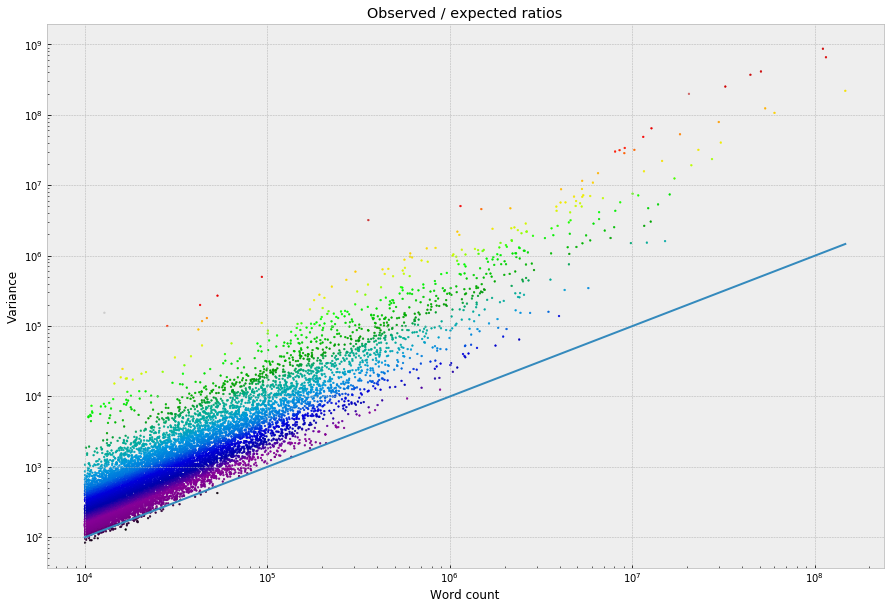

In [30]:
plt.figure(figsize=(15, 10))

plt.title('Observed / expected ratios')
plt.xlabel('Word count')
plt.ylabel('Variance')
plt.xscale('log')
plt.yscale('log')

norm = mpl.colors.LogNorm(
    vmin=df['score'].min(),
    vmax=df['score'].max(),
)

plt.scatter(
    df['count'], df['var'],
    s=3, c=df['score'],
    cmap='spectral', norm=norm,
)

plt.plot(df['count'], df['exp'])

plt.show()

In [34]:
df.sort_values('score', ascending=False).head(100)

,token,pos,count,var,exp,score,score_rank
9983,end,NNP,12811,1.535000e+05,1.268289e+02,1210.291802,1.0
13,you,PRP,20486079,1.984284e+08,2.028122e+05,978.385043,2.0
550,chapter,NNP,358378,3.187011e+06,3.547942e+03,898.270189,3.0
6,a,DT,44496195,3.702291e+08,4.405123e+05,840.451203,4.0
5,of,IN,50832217,4.126297e+08,5.032389e+05,819.947895,5.0
2,the,DT,111113733,8.683788e+08,1.100026e+06,789.416627,6.0
7,i,PRP,32422690,2.517762e+08,3.209846e+05,784.387222,7.0
1,.,.,115472128,6.570854e+08,1.143174e+06,574.790287,8.0
1891,chapter,NN,93460,4.974187e+05,9.252540e+02,537.602302,9.0
20,?,.,12766591,6.427663e+07,1.263893e+05,508.560891,10.0


In [46]:
from IPython.core.display import display, HTML

In [47]:
t100 = df.sort_values('score', ascending=False).head(200)

words = [
    f"<b>{r['token']}</b>" if i < 100 else r['token']
    for i, r in t100.iterrows()
]

display(HTML(', '.join(words)))

In [44]:
import numpy as np
import math

def plot_multiples(tokens, cols=5):
    
    # Get row count and figure size.
    rows = math.ceil(len(tokens) / cols)
    
    # Make the figure + axes.
    plt.figure(figsize=(cols*2, rows*1.6))
    
    for i, (token, pos) in enumerate(tokens):
        
        # Select the axis for the next plot.
        ax = plt.subplot2grid((rows, cols), (math.floor(i/cols), i%cols))
        
        # Configure axes.
        ax.set_title(f'{token} ({pos})', fontsize=10)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
        ax.tick_params(labelsize=8)
    
        series = cache.token_series(token, pos=pos)
        ax.plot(series/series.sum())

    plt.tight_layout(h_pad=1)
    plt.show()

In [25]:
top = (
    df.sort_values('count', ascending=False).head(100)
    .sort_values('score', ascending=False)
)

top = top[top['score_rank'] < 1000]

In [26]:
len(top)

90

In [27]:
top

,token,pos,count,var,exp,score,score_rank
13,you,PRP,20486079,1.984284e+08,2.028122e+05,978.385043,2.0
6,a,DT,44496195,3.702291e+08,4.405123e+05,840.451203,4.0
5,of,IN,50832217,4.126297e+08,5.032389e+05,819.947895,5.0
2,the,DT,111113733,8.683788e+08,1.100026e+06,789.416627,6.0
7,i,PRP,32422690,2.517762e+08,3.209846e+05,784.387222,7.0
1,.,.,115472128,6.570854e+08,1.143174e+06,574.790287,8.0
20,?,.,12766591,6.427663e+07,1.263893e+05,508.560891,10.0
26,”,'',11509207,4.854328e+07,1.139411e+05,426.038205,14.0
36,!,.,8067238,3.005259e+07,7.986566e+04,376.289268,15.0
31,said,VBD,9111312,3.375302e+07,9.020199e+04,374.193795,16.0


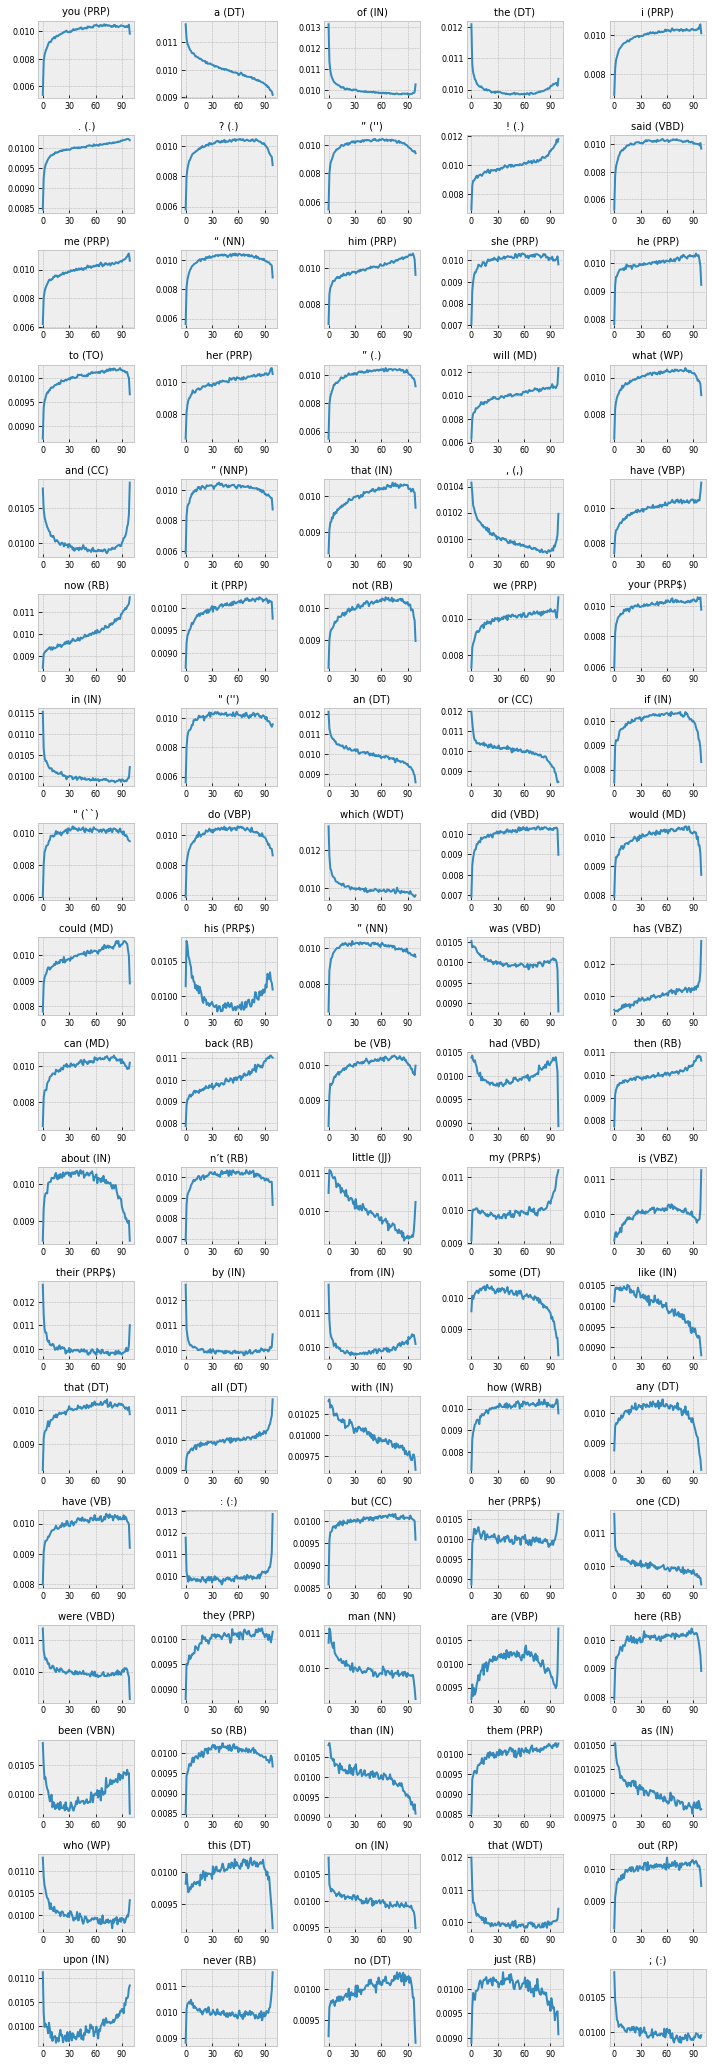

In [28]:
plot_multiples(top[['token', 'pos']].values)